In [2]:
import json
import great_expectations as gx

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic_df = gx.read_csv("../data/titanic.csv")

In [4]:
titanic_df.head()

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


<Axes: >

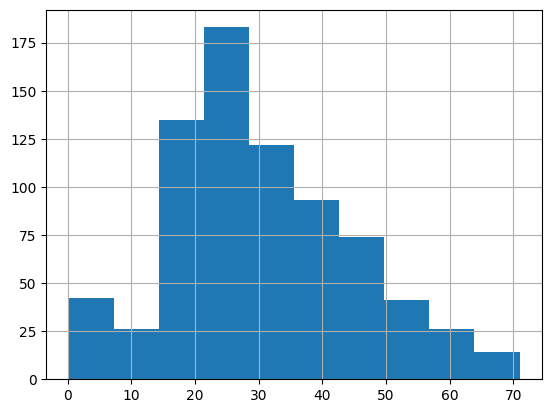

In [5]:
titanic_df.Age.hist()

In [6]:
titanic_df.expect_column_mean_to_be_between("Age", 20, 40)

{
  "success": true,
  "result": {
    "observed_value": 30.397989417989418,
    "element_count": 1313,
    "missing_count": 557,
    "missing_percent": 42.421934501142424
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [9]:
titanic_df.expect_column_values_to_be_between("Age", 20, 40)

{
  "success": false,
  "result": {
    "element_count": 1313,
    "missing_count": 557,
    "missing_percent": 42.421934501142424,
    "unexpected_count": 323,
    "unexpected_percent": 42.72486772486773,
    "unexpected_percent_total": 24.6001523229246,
    "unexpected_percent_nonmissing": 42.72486772486773,
    "partial_unexpected_list": [
      2.0,
      0.92,
      47.0,
      63.0,
      58.0,
      71.0,
      47.0,
      19.0,
      50.0,
      47.0,
      19.0,
      45.0,
      58.0,
      45.0,
      41.0,
      48.0,
      44.0,
      59.0,
      60.0,
      45.0
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [10]:
titanic_df.expect_column_values_to_match_regex(
    "Name", "[A-Z][a-z]+(?: \([A-Z][a-z]+\))?, ", mostly=0.95
)

{
  "success": true,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 3,
    "unexpected_percent": 0.2284843869002285,
    "unexpected_percent_total": 0.2284843869002285,
    "unexpected_percent_nonmissing": 0.2284843869002285,
    "partial_unexpected_list": [
      "Downton (?Douton), Mr William James",
      "Jacobsohn Mr Samuel",
      "Seman Master Betros"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [11]:
titanic_df.expect_column_values_to_be_in_set("Sex", ["male", "female"])

{
  "success": true,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [12]:
titanic_df.expect_column_values_to_be_in_set("Survived", [1, 0])

{
  "success": true,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [13]:
titanic_df.expect_column_values_to_be_in_set("PClass", ["1st", "2nd", "3rd"])

{
  "success": false,
  "result": {
    "element_count": 1313,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 1,
    "unexpected_percent": 0.07616146230007616,
    "unexpected_percent_total": 0.07616146230007616,
    "unexpected_percent_nonmissing": 0.07616146230007616,
    "partial_unexpected_list": [
      "*"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [12]:
#!!! Would be good to add an exception that verifies the rlationship between Sex and Sex Code

In [14]:
print(titanic_df.get_expectation_suite())
# titanic_df.save_expectation_suite('titanic_expectations.json')

{
  "expectation_suite_name": "default",
  "ge_cloud_id": null,
  "expectations": [
    {
      "expectation_type": "expect_column_mean_to_be_between",
      "kwargs": {
        "column": "Age",
        "min_value": 20,
        "max_value": 40
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_match_regex",
      "kwargs": {
        "column": "Name",
        "regex": "[A-Z][a-z]+(?: \\([A-Z][a-z]+\\))?, ",
        "mostly": 0.95
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_be_in_set",
      "kwargs": {
        "column": "Sex",
        "value_set": [
          "male",
          "female"
        ]
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_values_to_be_in_set",
      "kwargs": {
        "column": "Survived",
        "value_set": [
          1,
          0
        ]
      },
      "meta": {}
    }
  ],
  "data_asset_type": "Dataset",
  "meta": {
    "great_expectations_